<a href="https://colab.research.google.com/github/RenggaAnggarah645/PROJECT-UAS-PENAMBANGAN-DATA-KELOMPOK-7/blob/main/UAS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARY

In [ ]:
# 1. IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Kode tersebut berfungsi untuk mengimpor semua "perkakas" atau library Python yang dibutuhkan untuk membangun sebuah model prediksi. Pandas dan NumPy digunakan untuk memanipulasi dan mengelola data. Scikit-learn (sklearn) menyediakan fungsi-fungsi inti untuk machine learning, seperti membagi data menjadi set latihan dan tes (train_test_split), membangun model itu sendiri dengan algoritma Pohon Keputusan (DecisionTreeClassifier), serta mengukur seberapa baik kinerja model tersebut (classification_report, accuracy_score). Terakhir, Matplotlib dan plot_tree digunakan untuk membuat visualisasi, khususnya untuk menggambarkan struktur pohon keputusan yang telah dibuat agar mudah dipahami.

## LOAD DATA

In [ ]:
file_path = 'dataset_risiko_do_mahasiswa.csv'
df = pd.read_csv(file_path)

loading dataset dumy yang telah dibuat

## PREPROCESSING

In [ ]:
# Menampilkan informasi dasar dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2000 non-null   object 
 1   IPK_Sem1             2000 non-null   float64
 2   IPK_Sem2             2000 non-null   float64
 3   IPK_Sem3             2000 non-null   float64
 4   IPK_Sem4             2000 non-null   float64
 5   Kehadiran_Rata       2000 non-null   float64
 6   Remedial_Total       2000 non-null   int64  
 7   Aktivitas_Online     2000 non-null   int64  
 8   Pekerjaan            2000 non-null   object 
 9   Jam_Kerja_Mingguan   2000 non-null   int64  
 10  Pendapatan_OrangTua  2000 non-null   float64
 11  Tanggungan_Keluarga  2000 non-null   int64  
 12  Risiko_DO            2000 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 203.3+ KB
None


In [ ]:
# Menampilkan statistik deskriptif dataset
print(df.describe())

         IPK_Sem1     IPK_Sem2     IPK_Sem3     IPK_Sem4  Kehadiran_Rata  \
count  2000.00000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      2.82171     2.817940     2.801410     2.795910       79.976600   
std       0.48850     0.559336     0.618242     0.666127        9.692714   
min       1.50000     1.500000     1.500000     1.500000       50.000000   
25%       2.49000     2.430000     2.360000     2.310000       73.600000   
50%       2.82000     2.810000     2.800000     2.790000       80.100000   
75%       3.14000     3.210000     3.260000     3.300000       86.600000   
max       4.00000     4.000000     4.000000     4.000000      100.000000   

       Remedial_Total  Aktivitas_Online  Jam_Kerja_Mingguan  \
count     2000.000000       2000.000000         2000.000000   
mean         1.525000         10.052500            7.513000   
std          1.239412          3.131557           12.525146   
min          0.000000          2.000000            0.000000   


In [ ]:
# Mengecek missing value
print(df.isnull().sum())

ID                     0
IPK_Sem1               0
IPK_Sem2               0
IPK_Sem3               0
IPK_Sem4               0
Kehadiran_Rata         0
Remedial_Total         0
Aktivitas_Online       0
Pekerjaan              0
Jam_Kerja_Mingguan     0
Pendapatan_OrangTua    0
Tanggungan_Keluarga    0
Risiko_DO              0
dtype: int64


In [ ]:
# Mengecek Data Duplikat
print(df.duplicated().sum())

0


In [ ]:
# Definisikan kolom target
target_column = 'Risiko_DO'
print(f"🎯 Kolom target yang digunakan: '{target_column}'")

🎯 Kolom target yang digunakan: 'Risiko_DO'


Kode tersebut merupakan langkah krusial dalam tahap persiapan data, di mana Anda secara eksplisit memberi tahu program kolom mana yang menjadi tujuan atau target prediksi. Dengan menetapkan target_column = 'Risiko_DO', Anda mendefinisikan bahwa semua kolom lain akan digunakan untuk mencoba memprediksi nilai di kolom 'Risiko_DO' ini. Pernyataan print setelahnya berfungsi sebagai konfirmasi sederhana untuk memastikan bahwa kolom yang benar telah dipilih sebagai target sebelum melanjutkan ke proses selanjutnya.

In [ ]:
# Pisahkan fitur (X) dan target (y)
# Hapus kolom 'ID' karena tidak relevan untuk prediksi
X = df.drop([target_column, 'ID'], axis=1)
y = df[target_column]

Kode ini melakukan langkah fundamental dalam persiapan data machine learning dengan memecah dataset menjadi dua komponen utama. Variabel X dibuat sebagai himpunan fitur, yang berisi semua kolom dari data asli yang akan digunakan sebagai input untuk prediksi, namun dengan membuang kolom target ('Risiko_DO') dan kolom identitas ('ID') yang tidak relevan. Sementara itu, variabel y secara spesifik diisolasi untuk menampung data target, yaitu kolom 'Risiko_DO' yang nilainya ingin kita prediksi. Pemisahan ini esensial agar kita bisa melatih model untuk mempelajari pola dari X guna menebak hasil di y.

In [ ]:
# Encoding: Mengubah semua kolom kategorikal (tipe 'object') menjadi numerik
# pd.get_dummies() secara otomatis mengubah kolom 'Pekerjaan' menjadi 'Pekerjaan_Ya' (0 atau 1)
print("\n🔄 Mengubah data kategorikal menjadi numerik (One-Hot Encoding)...")
X_encoded = pd.get_dummies(X, drop_first=True)
print("Kolom setelah encoding:", X_encoded.columns.tolist())


🔄 Mengubah data kategorikal menjadi numerik (One-Hot Encoding)...
Kolom setelah encoding: ['IPK_Sem1', 'IPK_Sem2', 'IPK_Sem3', 'IPK_Sem4', 'Kehadiran_Rata', 'Remedial_Total', 'Aktivitas_Online', 'Jam_Kerja_Mingguan', 'Pendapatan_OrangTua', 'Tanggungan_Keluarga', 'Pekerjaan_Ya']


Kode ini melakukan langkah encoding, yaitu mengubah semua kolom yang berisi data non-numerik (seperti teks) di dalam himpunan fitur X menjadi format angka yang dapat dipahami oleh model machine learning. Secara spesifik, ia menggunakan fungsi pd.get_dummies untuk melakukan one-hot encoding pada kolom 'Pekerjaan'. Proses ini secara efektif mengubah kolom 'Pekerjaan' menjadi kolom baru bernama Pekerjaan_Ya, di mana nilai 1 merepresentasikan 'Ya' dan 0 merepresentasikan 'Tidak'. Penggunaan drop_first=True adalah praktik standar untuk menghindari redundansi data, sehingga X_encoded yang dihasilkan kini sepenuhnya numerik dan siap untuk tahap selanjutnya.

## SPLIT DATA

In [ ]:
# Pembagian data: 80% untuk training, 20% untuk testing
# stratify=y memastikan proporsi target di train dan test set sama
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\n📊 Data dibagi menjadi: {X_train.shape[0]} baris training dan {X_test.shape[0]} baris testing.")


📊 Data dibagi menjadi: 1600 baris training dan 400 baris testing.


Membagi dataset menjadi 80% training dan 20% testing

# MODELLING & EVALUASI

In [ ]:
# 4. PEMODELAN (MODELING)
print("\n--- Memulai Pemodelan ---")
# Inisialisasi model Decision Tree
# max_depth=5 untuk mencegah overfitting dan membuat visualisasi lebih mudah dibaca
model = DecisionTreeClassifier(max_depth=5, random_state=42)
# Melatih model dengan data training
model.fit(X_train, y_train)
print("✅ Model Decision Tree berhasil dilatih.")


--- Memulai Pemodelan ---
✅ Model Decision Tree berhasil dilatih.


Kode ini merupakan inti dari fase pemodelan, di mana model machine learning sesungguhnya dibuat dan dilatih. Pertama, sebuah objek model DecisionTreeClassifier diinisialisasi dengan dua parameter penting: max_depth=5 yang membatasi kedalaman "pohon" keputusan untuk mencegah model menjadi terlalu rumit dan overfitting (terlalu hafal data latihan), serta random_state=42 untuk memastikan model yang dihasilkan konsisten setiap kali kode dijalankan. Selanjutnya, metode .fit(X_train, y_train) digunakan untuk "melatih" model tersebut, di mana model akan menganalisis data latihan untuk mempelajari pola dan aturan keputusan yang paling baik dalam menghubungkan fitur (X_train) dengan target (y_train). Setelah selesai, variabel model kini berisi sebuah model yang telah terlatih dan siap untuk digunakan.

In [ ]:
# 5. EVALUASI MODEL (EVALUATION)
print("\n--- Memulai Evaluasi Model ---")
# Memprediksi data test
y_pred = model.predict(X_test)
# Menampilkan hasil evaluasi
target_names = ['Aman (Kelas 0)', 'Risiko DO (Kelas 1)']
print(f"\n📈 Akurasi Model: {accuracy_score(y_test, y_pred):.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred, target_names=target_names))


--- Memulai Evaluasi Model ---

📈 Akurasi Model: 94.25%

Confusion Matrix:
[[343   5]
 [ 18  34]]

Laporan Klasifikasi (Classification Report):
                     precision    recall  f1-score   support

     Aman (Kelas 0)       0.95      0.99      0.97       348
Risiko DO (Kelas 1)       0.87      0.65      0.75        52

           accuracy                           0.94       400
          macro avg       0.91      0.82      0.86       400
       weighted avg       0.94      0.94      0.94       400



Kode ini menjalankan fase evaluasi untuk mengukur kinerja model yang telah dilatih menggunakan data uji yang belum pernah dilihatnya. Pertama, ia menggunakan model.predict() untuk menghasilkan prediksi (y_pred) pada data fitur uji (X_test). Selanjutnya, kode ini mencetak tiga metrik evaluasi utama: Akurasi, yang menunjukkan persentase tebakan yang benar secara keseluruhan; Confusion Matrix, yang memberikan rincian tentang jenis kesalahan yang dibuat model (misalnya, berapa banyak mahasiswa berisiko yang salah diprediksi sebagai aman); dan Classification Report, yang menyajikan laporan lengkap berisi presisi, recall, dan f1-score untuk setiap kelas, memberikan pemahaman mendalam tentang seberapa baik model mengidentifikasi kasus "Aman" dan "Risiko DO".


--- Membuat Visualisasi Pohon Keputusan ---


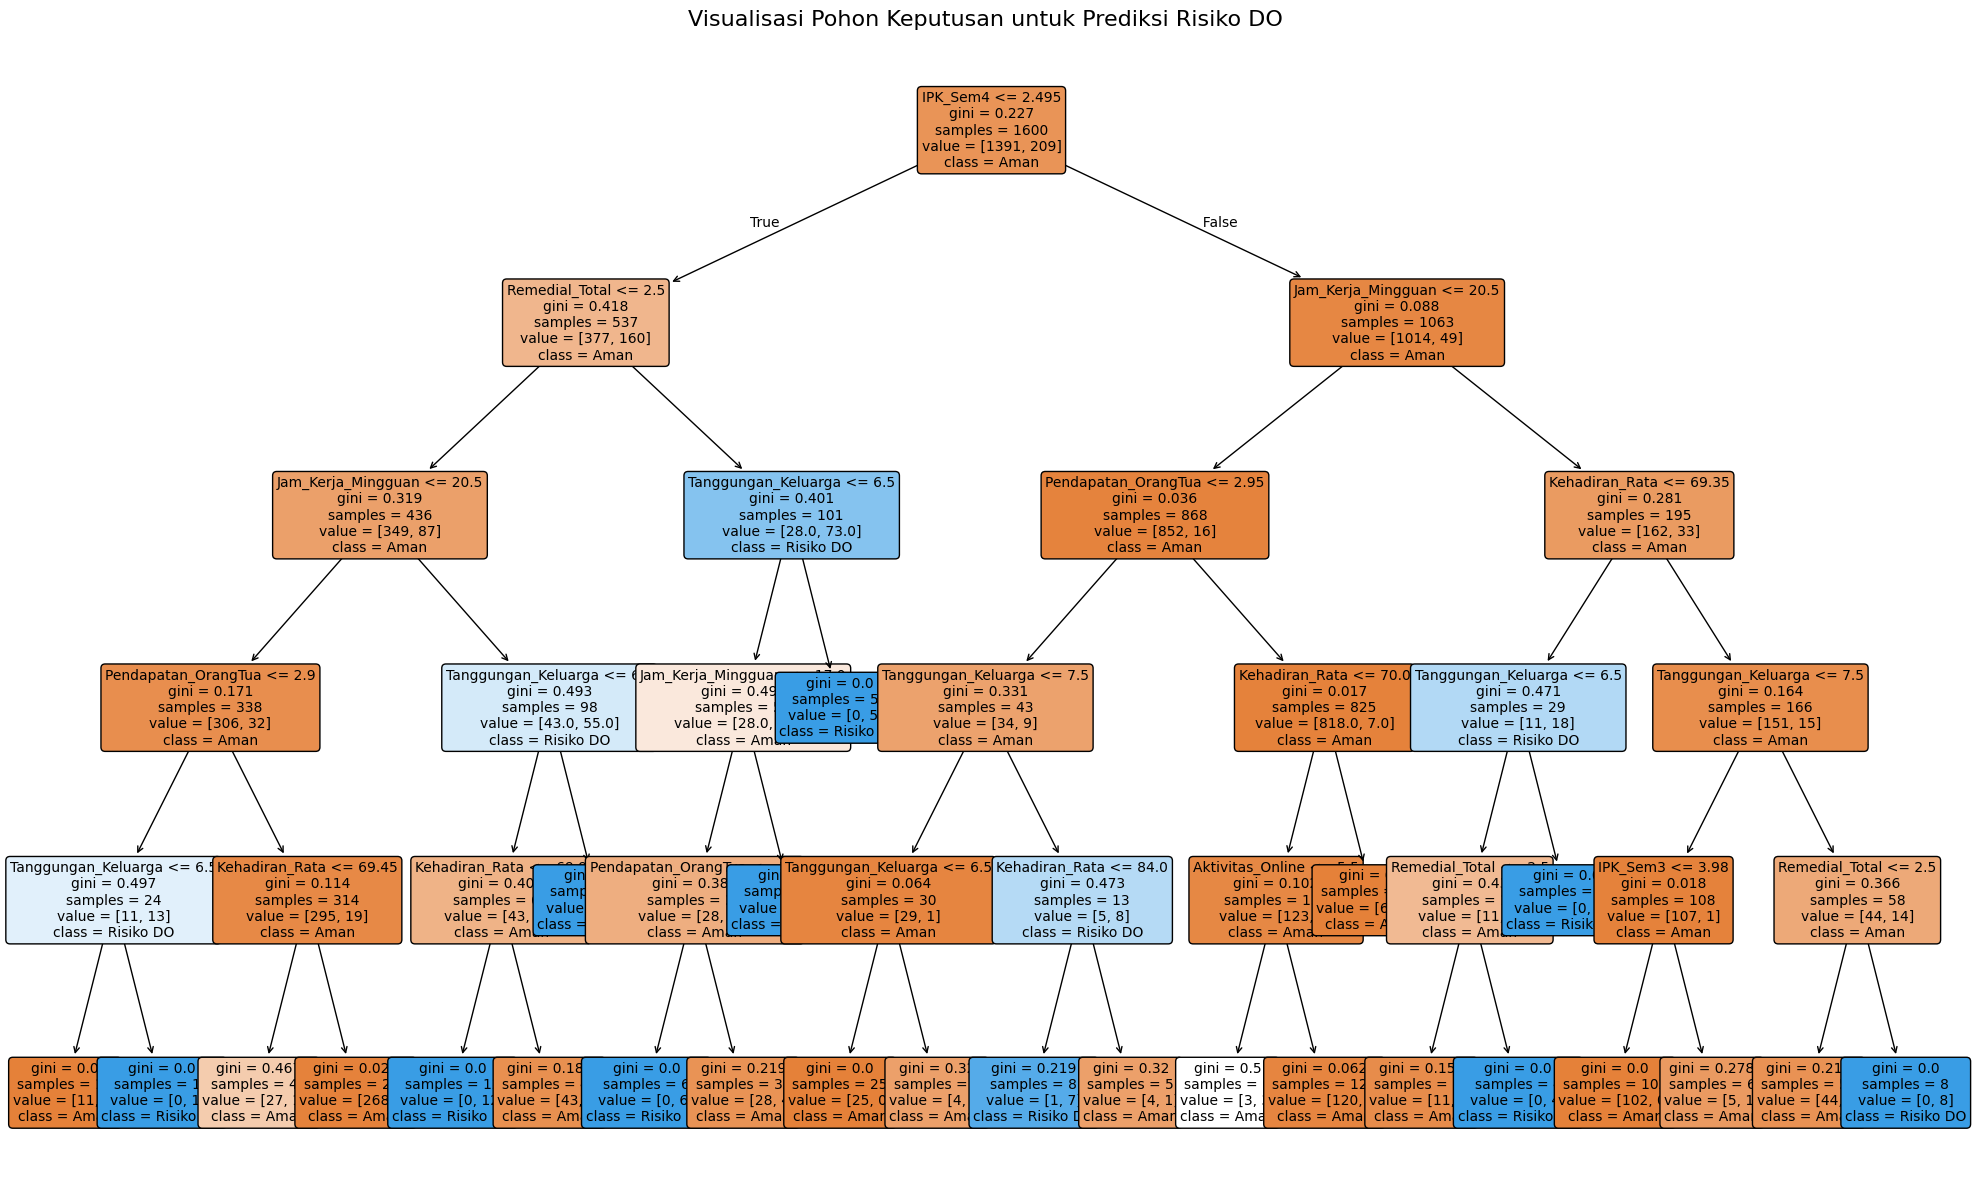

✅ Proses Selesai.


In [ ]:
# 6. VISUALISASI POHON KEPUTUSAN
print("\n--- Membuat Visualisasi Pohon Keputusan ---")
plt.figure(figsize=(25, 15))
plot_tree(
    model,
    feature_names=X_encoded.columns,
    class_names=['Aman', 'Risiko DO'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan untuk Prediksi Risiko DO", fontsize=16)
plt.show()
print("✅ Proses Selesai.")

Berdasarkan hasil evaluasi pada gambar, model prediksi Anda menunjukkan kinerja yang baik secara keseluruhan dengan akurasi 94.25%, yang berarti tebakannya seringkali benar. Model ini sangat andal dalam mengidentifikasi mahasiswa yang "Aman" (recall 99%), namun memiliki kelemahan dalam mendeteksi mahasiswa yang "Berisiko DO". Secara spesifik, metrik recall untuk kelas "Risiko DO" adalah 0.65, yang berarti model hanya berhasil menangkap 65% dari semua mahasiswa yang sebenarnya berisiko, sementara 35% sisanya (18 orang dalam data uji ini) terlewatkan dan salah diklasifikasikan sebagai "Aman". Oleh karena itu, meskipun model ini cukup presisi ketika menandai seseorang sebagai berisiko, tantangan utamanya adalah meningkatkan kemampuannya untuk menemukan semua kasus yang berisiko tersebut.

## EXPORT & INFERENSI

In [ ]:
# --- SIMPAN MODEL DAN KOLOM ---
import joblib

model_filename = 'model_prediksi_do.pkl'
columns_filename = 'kolom_model.pkl'

joblib.dump(model, model_filename)
joblib.dump(X_train.columns.tolist(), columns_filename) # Simpan daftar kolom training

print(f"💾 Model telah disimpan sebagai '{model_filename}'")
print(f"💾 Kolom model telah disimpan sebagai '{columns_filename}'")

💾 Model telah disimpan sebagai 'model_prediksi_do.pkl'
💾 Kolom model telah disimpan sebagai 'kolom_model.pkl'


Kode ini menjalankan fungsi krusial yaitu menyimpan (persistensi) model machine learning yang telah Anda latih ke dalam sebuah file di komputer Anda. Dengan menggunakan library joblib, proses ini mengamankan dua hal penting: pertama, seluruh "otak" atau struktur dari model Decision Tree yang sudah dilatih disimpan ke dalam file model_prediksi_do.pkl. Kedua, yang tidak kalah penting, daftar urutan nama-nama kolom (X_train.columns) yang digunakan saat pelatihan disimpan ke file kolom_model.pkl. Menyimpan kedua file ini memungkinkan Anda untuk menggunakan kembali model di lain waktu atau di aplikasi lain untuk membuat prediksi tanpa harus mengulang proses training dari awal, cukup dengan memuat file-file ini.

In [ ]:
import pandas as pd
import joblib
import os

# --- FUNGSI UTILITAS ---

def clear_screen():
    """Membersihkan layar terminal."""
    os.system('cls' if os.name == 'nt' else 'clear')

def get_numeric_input(prompt, input_type=float):
    """Meminta input numerik dan memastikan valid."""
    while True:
        try:
            value = input(prompt)
            return input_type(value)
        except ValueError:
            print(f"❌ Input tidak valid. Harap masukkan angka.")

def get_categorical_input(prompt, options):
    """Meminta input kategorikal dan memastikan valid."""
    while True:
        value = input(prompt).strip().capitalize()
        if value in options:
            return value
        else:
            print(f"❌ Input tidak valid. Harap masukkan salah satu dari: {', '.join(options)}")

# --- 1. MEMUAT MODEL DAN KOLOM ---
try:
    loaded_model = joblib.load('model_prediksi_do.pkl')
    model_columns = joblib.load('kolom_model.pkl')
    print("✅ Model dan kolom berhasil dimuat. Siap untuk prediksi.")
except FileNotFoundError:
    print("❌ Error: File model 'model_prediksi_do.pkl' atau 'kolom_model.pkl' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan skrip training untuk menyimpan model terlebih dahulu.")
    exit()

# --- 2. FUNGSI PREDIKSI ---
def prediksi_risiko_do(data_mahasiswa):
    """Fungsi untuk memprediksi risiko DO dari data mahasiswa baru."""
    df_input = pd.DataFrame([data_mahasiswa])
    df_processed = pd.get_dummies(df_input, drop_first=True)
    df_aligned = df_processed.reindex(columns=model_columns, fill_value=0)
    prediksi = loaded_model.predict(df_aligned)
    probabilitas = loaded_model.predict_proba(df_aligned)
    return prediksi[0], probabilitas[0]

# --- 3. FUNGSI BARU UNTUK MEMBERIKAN SARAN ---
def berikan_saran(data_mahasiswa):
    """Menganalisis data input dan memberikan daftar saran perbaikan."""
    saran_list = []

    # Aturan 1: Cek IPK terakhir
    if data_mahasiswa['IPK_Sem4'] < 2.75:
        saran_list.append("💡 IPK semester terakhir Anda di bawah batas wajar. Segera konsultasi dengan Dosen Pembimbing Akademik (DPA) untuk menyusun strategi belajar.")

    # Aturan 2: Cek Kehadiran
    if data_mahasiswa['Kehadiran_Rata'] < 80.0:
        saran_list.append(" attendance. Pastikan untuk selalu hadir di kelas. Jika ada kendala, komunikasikan dengan dosen.")

    # Aturan 3: Cek jumlah remedial
    if data_mahasiswa['Remedial_Total'] > 2:
        saran_list.append("📚 Jumlah remedial cukup banyak. Identifikasi mata kuliah yang sulit dan pertimbangkan untuk mengikuti kelas tambahan atau tutor sebaya.")

    # Aturan 4: Cek jam kerja jika bekerja
    if data_mahasiswa['Pekerjaan'] == 'Ya' and data_mahasiswa['Jam_Kerja_Mingguan'] > 20:
        saran_list.append("⏰ Jam kerja Anda cukup tinggi. Buat jadwal yang ketat antara kuliah, belajar, dan bekerja untuk menghindari kelelahan dan menjaga fokus akademik.")

    # Aturan 5: Cek faktor ekonomi (contoh sederhana)
    # Pendapatan per tanggungan
    if data_mahasiswa['Tanggungan_Keluarga'] > 0:
      pendapatan_per_tanggungan = data_mahasiswa['Pendapatan_OrangTua'] / data_mahasiswa['Tanggungan_Keluarga']
      if pendapatan_per_tanggungan < 1.5: # Ambang batas 1.5 juta per tanggungan
          saran_list.append("💰 Jika ada kendala finansial, coba cari informasi beasiswa atau bantuan dana pendidikan yang tersedia di bagian kemahasiswaan.")

    return saran_list

# --- 4. LOOP UTAMA UNTUK INPUT PENGGUNA (DENGAN MODIFIKASI) ---
while True:
    clear_screen()
    print("==============================================")
    print("   Sistem Prediksi Risiko Drop Out Mahasiswa  ")
    print("==============================================")
    print("Silakan masukkan data mahasiswa baru:\n")

    # Kumpulkan data dari input pengguna
    data_baru = {
        'IPK_Sem1': get_numeric_input("IPK Semester 1 (contoh: 3.5): ", float),
        'IPK_Sem2': get_numeric_input("IPK Semester 2 (contoh: 3.2): ", float),
        'IPK_Sem3': get_numeric_input("IPK Semester 3 (contoh: 2.9): ", float),
        'IPK_Sem4': get_numeric_input("IPK Semester 4 (contoh: 2.5): ", float),
        'Kehadiran_Rata': get_numeric_input("Rata-rata Kehadiran (%) (contoh: 85): ", float),
        'Remedial_Total': get_numeric_input("Total Remedial (contoh: 2): ", int),
        'Aktivitas_Online': get_numeric_input("Aktivitas Online (jam/minggu) (contoh: 10): ", int),
        'Pekerjaan': get_categorical_input("Apakah mahasiswa bekerja? (Ya/Tidak): ", ['Ya', 'Tidak']),
        'Jam_Kerja_Mingguan': get_numeric_input("Jam Kerja per Minggu (isi 0 jika tidak bekerja): ", int),
        'Pendapatan_OrangTua': get_numeric_input("Pendapatan Orang Tua (juta/bulan) (contoh: 5.5): ", float),
        'Tanggungan_Keluarga': get_numeric_input("Jumlah Tanggungan Keluarga (contoh: 4): ", int),
    }

    # Lakukan prediksi
    prediksi, probabilitas = prediksi_risiko_do(data_baru)

    # Tampilkan hasil
    print("\n------------------ HASIL PREDIKSI ------------------")
    if prediksi == 1:
        print("🔴 Status Prediksi: BERISIKO DROP OUT")
    else:
        print("🟢 Status Prediksi: AMAN")

    print("\nKeyakinan Model:")
    print(f"  - Probabilitas Aman: {probabilitas[0]:.2%}")
    print(f"  - Probabilitas Berisiko DO: {probabilitas[1]:.2%}")

    # --- TAMPILKAN SARAN JIKA BERISIKO ---
    if prediksi == 1:
        saran = berikan_saran(data_baru)
        if saran: # Jika ada saran yang dihasilkan
            print("\n🔍 Rekomendasi Perbaikan:")
            for item in saran:
                print(f"   - {item}")
    else:
        print("\n👍 Pertahankan performa baik Anda!")

    print("----------------------------------------------------\n")

    # Tanyakan apakah ingin mengulang
    lagi = input("Apakah Anda ingin menguji data mahasiswa lain? (y/n): ").strip().lower()
    if lagi != 'y':
        print("\nTerima kasih telah menggunakan sistem prediksi. Sampai jumpa!")

✅ Model dan kolom berhasil dimuat. Siap untuk prediksi.
   Sistem Prediksi Risiko Drop Out Mahasiswa  
Silakan masukkan data mahasiswa baru:

IPK Semester 1 (contoh: 3.5): 2
IPK Semester 2 (contoh: 3.2): 2
IPK Semester 3 (contoh: 2.9): 2
IPK Semester 4 (contoh: 2.5): 2
Rata-rata Kehadiran (%) (contoh: 85): 30
Total Remedial (contoh: 2): 10
Aktivitas Online (jam/minggu) (contoh: 10): 3
Apakah mahasiswa bekerja? (Ya/Tidak): Ya
Jam Kerja per Minggu (isi 0 jika tidak bekerja): 30
Pendapatan Orang Tua (juta/bulan) (contoh: 5.5): 2
Jumlah Tanggungan Keluarga (contoh: 4): 4

------------------ HASIL PREDIKSI ------------------
🔴 Status Prediksi: BERISIKO DROP OUT

Keyakinan Model:
  - Probabilitas Aman: 0.00%
  - Probabilitas Berisiko DO: 100.00%

🔍 Rekomendasi Perbaikan:
   - 💡 IPK semester terakhir Anda di bawah batas wajar. Segera konsultasi dengan Dosen Pembimbing Akademik (DPA) untuk menyusun strategi belajar.
   -  attendance. Pastikan untuk selalu hadir di kelas. Jika ada kendala, komu

KeyboardInterrupt: Interrupted by user

Kode ini secara keseluruhan menciptakan sebuah aplikasi inferensi interaktif yang memungkinkan pengguna untuk secara langsung menguji data mahasiswa baru terhadap model prediksi risiko drop out yang telah dilatih sebelumnya. Program ini pertama-tama memuat model dan konfigurasi kolom dari file yang tersimpan, kemudian memasuki sebuah loop di mana ia akan meminta pengguna untuk memasukkan data-data mahasiswa satu per satu melalui terminal, lengkap dengan validasi untuk memastikan input yang dimasukkan benar. Setelah data terkumpul, skrip akan menggunakan model yang dimuat untuk menghasilkan prediksi ("Aman" atau "Berisiko DO") beserta tingkat keyakinan (probabilitas), dan yang terpenting, jika mahasiswa diprediksi berisiko, program akan secara otomatis menganalisis input tersebut untuk memberikan serangkaian saran perbaikan yang spesifik dan relevan, menjadikan aplikasi ini sebagai alat bantu diagnostik yang actionable.